#Q7

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from numpy.random import uniform
from numpy import array
from numpy import concatenate
import random
import math

Creating data point

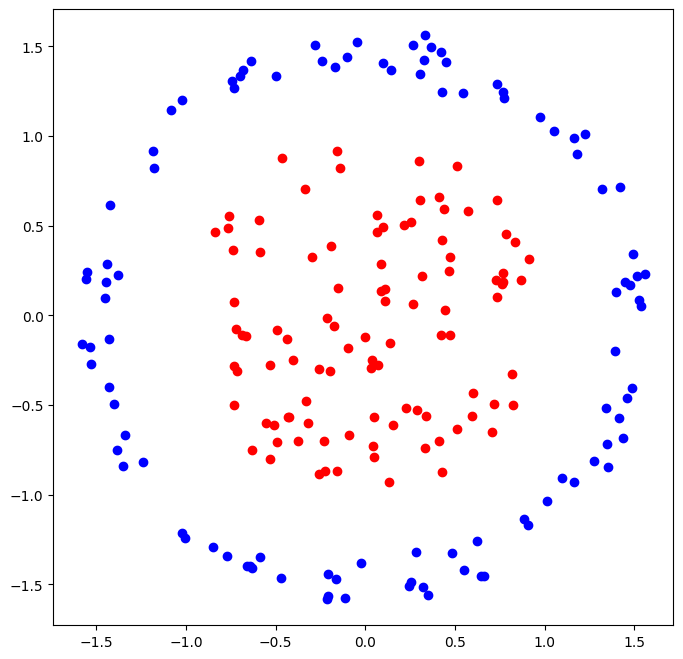

In [2]:
num_points = 100
min_radius = 0
max_radius = 1

points = []
for i in range(num_points):
    radius = min_radius + (max_radius - min_radius) * math.sqrt(random.uniform(0, 1))
    angle = random.uniform(0, 2 * math.pi)
    x = radius * math.cos(angle) 
    y = radius * math.sin(angle)
    points.append((x, y))


x_coords1 = [point[0] for point in points]
y_coords1 = [point[1] for point in points]


num_points = 100
min_radius = 1.3
max_radius = 1.6

points = []
for i in range(num_points):
    radius = min_radius + (max_radius - min_radius) * math.sqrt(random.uniform(0, 1))
    angle = random.uniform(0, 2 * math.pi)
    x = radius * math.cos(angle) 
    y = radius * math.sin(angle)
    points.append((x, y))

x_coords2 = [point[0] for point in points]
y_coords2 = [point[1] for point in points]

x_coords1 = array(x_coords1)
y_coords1 = array(y_coords1)

x_coords2 = array(x_coords2)
y_coords2 = array(y_coords2)

X =[];
for i in range(len(x_coords1)):
   X.append([x_coords1[i], y_coords1[i]])
for i in range(len(x_coords2)):
   X.append([x_coords2[i], y_coords2[i]])
X =array(X)
Y=[];
for i in range(100):
  Y.append(0)
for i in range(100):
  Y.append(1)
Y =array(Y)


plt.figure(figsize=(8, 8))
plt.scatter(x_coords1, y_coords1, color ="red")
plt.scatter(x_coords2, y_coords2, color ="blue")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axis('equal')
plt.show()



##spilit data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# print(y_test)

##train data with 3 neorin

In [24]:
import numpy as np

class MLP:
    def __init__(self, n_input, n_hidden, n_output, lr=0.1):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.lr = lr

        self.weights_ih = np.random.randn(n_hidden, n_input)
        self.weights_ho = np.random.randn(n_output, n_hidden)

        self.bias_h = np.zeros((n_hidden, 1))
        self.bias_o = np.zeros((n_output, 1))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def feedforward(self, inputs):
        inputs = inputs.reshape((self.n_input, 1))
        hidden = self.sigmoid(np.dot(self.weights_ih, inputs) + self.bias_h)
        output = self.sigmoid(np.dot(self.weights_ho, hidden) + self.bias_o)
        return output
    
    def backpropagation(self, inputs, targets):
     inputs = inputs.reshape((self.n_input, 1))
     targets = targets.reshape((self.n_output, 1))

     hidden = self.sigmoid(np.dot(self.weights_ih, inputs) + self.bias_h)
     output = self.sigmoid(np.dot(self.weights_ho, hidden) + self.bias_o)

     output_errors = targets - output
     hidden_errors = np.dot(self.weights_ho.T, output_errors)

     output_gradients = output_errors * self.sigmoid_derivative(output)
     hidden_gradients = hidden_errors * self.sigmoid_derivative(hidden)

     self.weights_ho += self.lr * np.dot(output_gradients, hidden.T)
     self.weights_ih += self.lr * np.dot(hidden_gradients, inputs.T)
     self.bias_o += self.lr * output_gradients
     self.bias_h += self.lr * hidden_gradients
 
        
    def train(self, X_train, y_train, epochs):
        for epoch in range(epochs):
            for inputs, targets in zip(X_train, y_train):
                self.backpropagation(inputs, targets)
    def predict(self, X, threshold=0.5):
        y_pred = []
        for inputs in X:
            output = self.feedforward(inputs)
            if output >= threshold:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return np.array(y_pred)



mlp = MLP(n_input=2, n_hidden=6, n_output=1)
mlp.train(X_train, y_train, epochs=500)
y_pred = mlp.predict(X_test)
print(y_pred.flatten())  
print(y_test)  

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred.flatten())

print("Accuracy:", accuracy) 


[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1]
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1]
Accuracy: 1.0


<ipython-input-25-e09c77d472fe>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


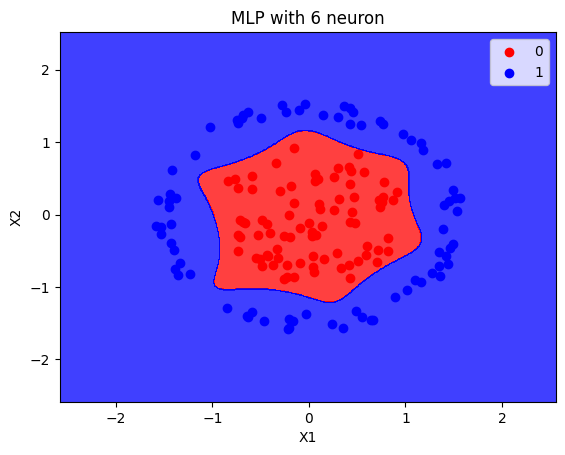

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, mlp.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('MLP with 6 neuron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()